In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
DOWNLOAD_ROOT = "ramjasmaurya/world-war-2-archive"
DATA_DIR = os.path.join("datasets", "wwii-archive")

def load_archive_data(housing_path=DATA_DIR, encoding='utf-8'):
    csv_path = os.path.join(housing_path, "Aircraft.csv")
    return pd.read_csv(csv_path, sep=',', encoding=encoding,index_col=0)

try:
    aircraft_data = load_archive_data()
except UnicodeDecodeError:
    try:
        aircraft_data = load_archive_data(encoding='ISO-8859-1')
    except UnicodeDecodeError:
        aircraft_data = load_archive_data(encoding='Windows-1252')

aircraft_data.head()

,Name,Primary Role,Manufacturer,Country
0,143,Medium Bomber,Avions Amiot,France
1,2MB1,Light Bomber,Mitsubishi Heavy Industries,Japan
2,2MR8,Reconnaissance Aircraft,Mitsubishi Heavy Industries,Japan
3,351/354,Medium Bomber,Avions Amiot,France
4,A-17,Ground Attack Aircraft,Northrop Corporation,United States


In [3]:
aircraft_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 339 entries, 0 to 338
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          339 non-null    object
 1   Primary Role  339 non-null    object
 2   Manufacturer  338 non-null    object
 3   Country       339 non-null    object
dtypes: object(4)
memory usage: 13.2+ KB


In [4]:
aircraft_data.isnull().sum()

Name            0
Primary Role    0
Manufacturer    1
Country         0
dtype: int64

In [5]:
aircraft_data['Country'].unique()

array(['France', 'Japan', 'United States', 'United Kingdom', 'Germany',
       'Czechoslovakia', 'Italy', 'Russia', 'Australia', 'China',
       'Canada', 'Netherlands', 'Romania', 'Yugoslavia', 'Poland'],
      dtype=object)

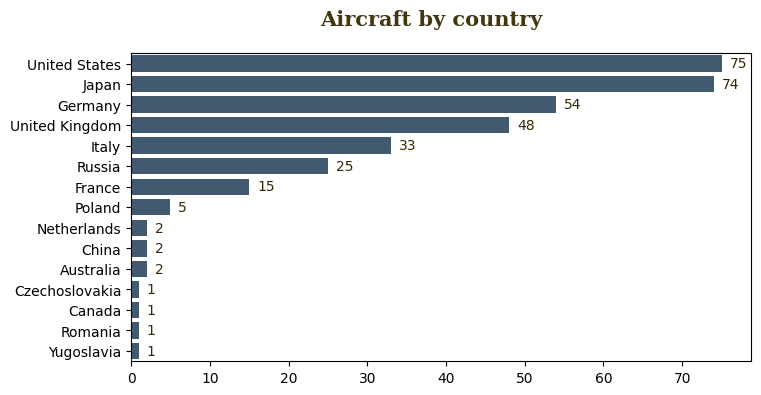

In [6]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(
    data=aircraft_data,
    y='Country',
    ax=ax,
    order=aircraft_data['Country'].value_counts().index,
    legend=False,
    color='#3A5A78',
)

for p in ax.patches:
    width = p.get_width() 
    ax.text(
        width + 1, 
        p.get_y() + p.get_height() / 2, 
        f'{int(width)}',
        va='center',
        fontsize=10,
        color='#332804'
    )

fig.text(0.5,.95,
         'Aircraft by country', 
         fontfamily='serif',
         ha = 'center',
         fontsize=15, 
         fontweight='bold',
         color='#433710')

ax.set_xlabel('')
ax.set_ylabel('')
plt.show()

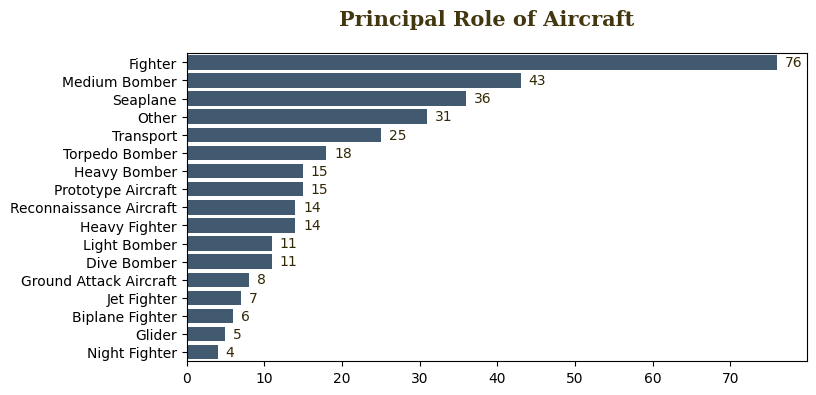

In [7]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(
    data=aircraft_data,
    y='Primary Role',
    ax=ax,
    order=aircraft_data['Primary Role'].value_counts().index,
    legend=False,
    color='#3A5A78', 
)

for p in ax.patches:
    width = p.get_width() 
    ax.text(
        width + 1, 
        p.get_y() + p.get_height() / 2, 
        f'{int(width)}',
        va='center',
        fontsize=10,
        color='#332804'
    )


fig.text(0.5,.95,
         'Principal Role of Aircraft', 
         fontfamily='serif',
         ha = 'center',
         fontsize=15, 
         fontweight='bold',
         color='#433710')

ax.set_xlabel('')
ax.set_ylabel('')
plt.show()

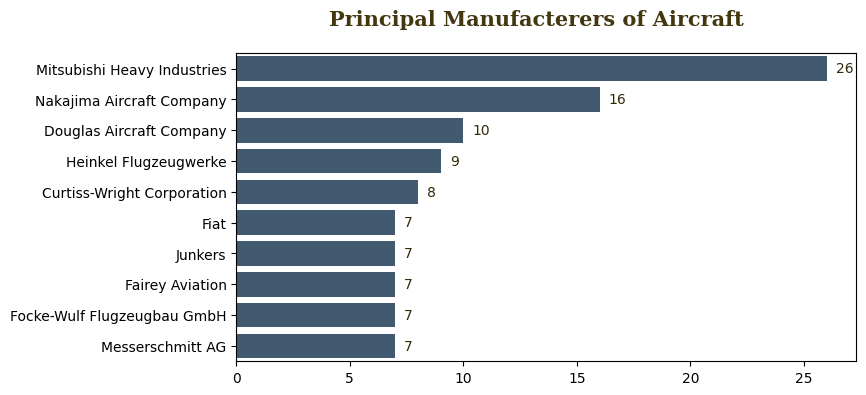

In [8]:
top_10_manufacturers = aircraft_data['Manufacturer'].groupby(aircraft_data['Manufacturer']).count().sort_values(ascending=False).head(10)
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(
    y=top_10_manufacturers.index, 
    x=top_10_manufacturers.values,
    ax=ax,    
    legend=False,
    color='#3A5A78', 
)

for p in ax.patches:
    width = p.get_width() 
    ax.text(
        width + .4, 
        p.get_y() + p.get_height() / 2, 
        f'{int(width)}',
        va='center',
        fontsize=10,
        color='#332804'
    )


fig.text(0.5,.95,
         'Principal Manufacterers of Aircraft', 
         fontfamily='serif',
         ha = 'center',
         fontsize=15, 
         fontweight='bold',
         color='#433710')

ax.set_xlabel('')
ax.set_ylabel('')
plt.show()

In [9]:
kind_aircraft = ['Bomber', 'Fighter', 'Seaplane', 'Transport', 'Prototype', 'Reconnaissance', 'Trainer', 'Utility', 'Liaison', 'Glider']
df_kind_aircraft = aircraft_data.copy()
df_kind_aircraft['Role'] = None

for index, x in enumerate(aircraft_data['Primary Role']):
    words = x.split()
    for word in words:
        if word in kind_aircraft:
            df_kind_aircraft.at[index, 'Role'] = word
            break
        if word == words[-1]:
            df_kind_aircraft.at[index, 'Role'] = 'Other'

C:\Users\franf\AppData\Local\Temp\ipykernel_6636\3859709503.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\franf\AppData\Local\Temp\ipykernel_6636\3859709503.py:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_text = f"{labels[i]}: {counts[i]} ({counts[i]/sum(counts)*100:.1f}%)"


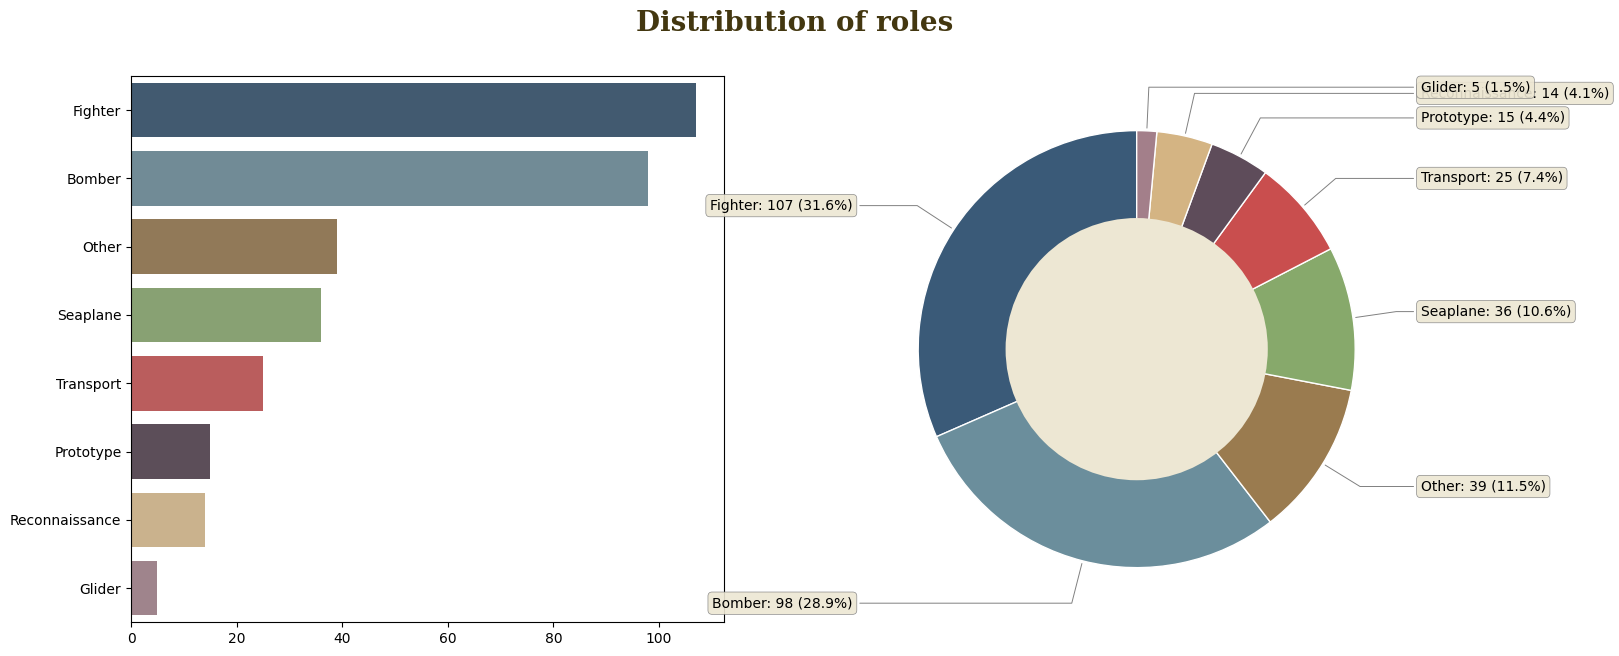

In [10]:
custom_palette = [
    "#3A5A78",  # Azul oscuro profesional (títulos)
    "#6B8E9C",  # Azul verdoso apagado (subtítulos/gráficos)
    "#9A7B4F",  # Marrón cálido (datos destacados)
    "#87A96B",  # Verde suave (indicadores positivos)
    "#C94E4E",  # Rojo terracota (alertas/negativos)
    "#5E4C5A",  # Púrpura oscuro (accesorios/contraste)
    "#D4B483",  # Dorado claro (botones/acentos)
    "#A37F8A"   # Rosa terroso** (uso: líneas divisorias/series secundarias)
]

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
order_roles = df_kind_aircraft['Role'].value_counts().index

sns.countplot(
    data=df_kind_aircraft,
    y='Role',
    ax=ax[0],
    order=df_kind_aircraft['Role'].value_counts().index,
    legend=False,
    palette=custom_palette[:len(order_roles)] 
)
ax[0].set_ylabel('')
ax[0].set_xlabel('')

counts = df_kind_aircraft['Role'].value_counts()
labels = counts.index


wedges, texts, autotexts = ax[1].pie(
    counts,
    labels=None,
    autopct='',
    startangle=90,
    colors=custom_palette,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    pctdistance=0.75
)

centre_circle = plt.Circle((0, 0), 0.6, fc='#EDE7D3', linewidth=0)  
ax[1].add_artist(centre_circle)

bbox_props = dict(boxstyle="round,pad=0.3", fc="#EDE7D3", ec="gray", lw=0.5, alpha=0.9)

kw = dict(
    arrowprops=dict(arrowstyle="-", color="gray", lw=0.7),
    bbox=bbox_props,
    zorder=0,
    va="center",
    fontsize=10
)

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    label_text = f"{labels[i]}: {counts[i]} ({counts[i]/sum(counts)*100:.1f}%)"
    ax[1].annotate(
        label_text,
        xy=(x, y),
        xytext=(1.3*np.sign(x), 1.2*y),
        horizontalalignment=horizontalalignment,
        **kw
    )


fig.text(0.5,1.05,
         'Distribution of roles', 
         fontfamily='serif',
         ha = 'center',
         fontsize=20, 
         fontweight='bold',
         color='#433710')

plt.tight_layout()
plt.show()